# 09132022 Challenge Lab #6 - Sentiment Analysis

<img src="https://www.bytesview.com/images/products/sentiment/sentiment-analytics-machine-learning.png"  width="30%" height="30%">

"**Sentiment analysis** *is the use of natural language processing, text analysis, computational linguistics, and biometrics to systematically identify, extract, quantify, and study affective states and subjective information. Sentiment analysis is widely applied to **voice of the customer materials** such as reviews and survey responses, online and social media, and healthcare materials for applications that range from marketing to customer service to clinical medicine.*"

Source: https://en.wikipedia.org/wiki/Sentiment_analysis

### What can it do for business:

import re

# Sentiment Analysis - Lexicons-based

In [6]:
# Example 1a:  dataset for creating our own Unsupervised learning Lexicon
import re
reviews = [
    "The server was rude, bad location, poor service overall, call 911!",
    "This bike is amazing, but the braking is very poor",
    "This ice maker works great, the price is very reasonable, but some bad smells emanate from the ice maker",
    "The food was awesome, but the cashier was very rude and made obscene comments about my shirt."
    ]

In [7]:
# Example 1b:  negative and positive word lists ... this is called "lexicon" that we are using.
positive_words = ['amazing', 'great', 'awesome', 'reasonable']
negative_words = ['poor', 'bad', 'rude', 'obscene']

In [8]:
# Example 1c: Remove useless numbers and alphanumerical words (good for some sentiment analysis techniques)
documents = [re.sub("[^a-zA-Z]+", " ", document) for document in reviews]
documents

['The server was rude bad location poor service overall call ',
 'This bike is amazing but the braking is very poor',
 'This ice maker works great the price is very reasonable but some bad smells emanate from the ice maker',
 'The food was awesome but the cashier was very rude and made obscene comments about my shirt ']

In [9]:
# Example 1d: tokenize - get an array of strings
texts = [[word for word in document.lower().split() ] for document in documents]
texts

[['the',
  'server',
  'was',
  'rude',
  'bad',
  'location',
  'poor',
  'service',
  'overall',
  'call'],
 ['this',
  'bike',
  'is',
  'amazing',
  'but',
  'the',
  'braking',
  'is',
  'very',
  'poor'],
 ['this',
  'ice',
  'maker',
  'works',
  'great',
  'the',
  'price',
  'is',
  'very',
  'reasonable',
  'but',
  'some',
  'bad',
  'smells',
  'emanate',
  'from',
  'the',
  'ice',
  'maker'],
 ['the',
  'food',
  'was',
  'awesome',
  'but',
  'the',
  'cashier',
  'was',
  'very',
  'rude',
  'and',
  'made',
  'obscene',
  'comments',
  'about',
  'my',
  'shirt']]

In [49]:
for sentence in texts:
    print(sentence)

['the', 'server', 'was', 'rude', 'bad', 'location', 'poor', 'service', 'overall', 'call']
['this', 'bike', 'is', 'amazing', 'but', 'the', 'braking', 'is', 'very', 'poor']
['this', 'ice', 'maker', 'works', 'great', 'the', 'price', 'is', 'very', 'reasonable', 'but', 'some', 'bad', 'smells', 'emanate', 'from', 'the', 'ice', 'maker']
['the', 'food', 'was', 'awesome', 'but', 'the', 'cashier', 'was', 'very', 'rude', 'and', 'made', 'obscene', 'comments', 'about', 'my', 'shirt']


In [50]:
# Example 1e: loop inside loop (nested loop)
for sentence in texts:  
    positive = 0
    negative = 0
    for word in sentence:
        if word in positive_words:
            positive += 1
        elif word in negative_words:
            negative += 1
    print(positive, negative)

0 3
1 1
2 1
1 2


**If positive (negative) words dominate, the sentence is classified as positive (negative)**

In [51]:
# Example 1f: Show result

for sentence in texts: 
    positive = 0
    negative = 0
    for word in sentence:
        if word in positive_words:
            positive += 1
        elif word in negative_words:
            negative += 1
    print(positive, negative, positive-negative, "Positive" if positive-negative > 0 else "Neutral" if positive-negative == 0 else "Negative")

0 3 -3 Negative
1 1 0 Neutral
2 1 1 Positive
1 2 -1 Negative


# Case example 1: Rotten Tomatoes Movie Reviews

- **Supervised machine learning**: use of labeled datasets to train algorithms that to classify data or predict outcomes accurately. 
- **Unsupervised machine learning**: uses unlabeled datasets. From that data, it discovers patterns that help solve for clustering or association problems. This is particularly useful when subject matter experts are unsure of common properties within a data set. 

Source: https://www.ibm.com/cloud/learn/supervised-learning#:~:text=Supervised%20learning%2C%20also%20known%20as,data%20or%20predict%20outcomes%20accurately.

- **Supervised example:**
    - Positive / Negative
    - Fresh / Rotten 
    - Good / Bad
- **Unsupervised examples:**
    - "The battery life of this camera is too short."
    - "Yes. I just love working overtime. Sheesh."

## Scraping movie reviews from Rotten Tomatoes for a specific movie (first page) -- BeautifulSoup

Import libraries

In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords

The scraper

In [3]:
# Get a movie's url from Rotten Tomatoes
URL = 'https://www.rottentomatoes.com/m/prey_2022/reviews'
page = requests.get(URL)
soup = BeautifulSoup(page.content, 'html.parser')
results = soup.find(class_='review_table')
#results

In [4]:
# Get the experts' reviews
review_texts = results.find_all('div', class_='row review_table_row')
#review_texts

In [5]:
for review_text in review_texts:
    author = review_text.find('a',class_="unstyled bold articleLink")
    date = review_text.find('div',class_="review-date subtle small")
    review = review_text.find('div',class_="the_review")
    
    author_clean = re.sub(r"[\(<>/)!#$%&'*+-.^_`|~:’]",'',author.text)
    date_clean = re.sub(r"[\(<>/)!#$%&'*+-.^_`|~:’]",'',date.text)
    review_clean = re.sub(r"[\(<>/)!#$%&'*+-.^_`|~:’]",'',review.text)
    #review_clean = re.sub(r"[^a-zA-Z0-9]+",' ',review.text)
    
    print(author_clean.strip(),date_clean.strip(), review_clean.strip())

Alex Billington Sep 20 2022 Its gritty and muddy yet still beautiful and invigorating its packed with seriously tense action and its all about using cunning tactics and the environment around you to outwit and outsmart a vicious Predator warrior
Cory Woodroof Sep 20 2022 Dan Trachtenberg didnt need to prove anything after directing certified masterpiece 10 Cloverfield Lane as his first feature but this is a quite good generously gory Predator flick
Charlotte Harrison Sep 19 2022 A prequel to the Predator franchise this taut and thrilling is atmospheric and exceptionally welltold
Pete Vonder Haar Sep 16 2022 Amber Midthunder is the best thing to happen to this franchise since Topher Grace bought it in iPredatorsi and while its probably too much to hope for a followup she and Trachtenberg have given us the best Predator since the original
Dev Shea Sep 15 2022 Im not sure I can recommend Prey enough Its visually beautiful full of layered stories and environments and it has a completely ba

# Sentiment Analysis - Rotten Tomatoes Movie Reviews

In [7]:
#Bing-Liu lexicon (positive word list & negative word list)
positive_words = open('Bing_liu_positive.txt', "r").read().splitlines()
negative_words = open('Bing_liu_negative.txt', "r").read().splitlines()

In [8]:
for review_text in review_texts:
    review = review_text.find('div',class_="the_review")
    review_clean = re.sub(r"[\(<>/)!#$%&'*+-.^_`|~:’“”?]",'',review.text)
    documents = [review_clean for document in review]
    token = [[word for word in document.lower().split() ] for document in documents]

    for sentence in token:
        positive = 0
        negative = 0
        for word in sentence:
            if word in positive_words:
                positive += 1
            elif word in negative_words:
                negative += 1
        print(positive, negative, positive-negative, "Positive" if positive-negative > 0 
              else "Neutral" if positive-negative == 0 else "Negative")

4 4 0 Neutral
3 0 3 Positive
2 1 1 Positive
3 0 3 Positive
5 0 5 Positive
1 0 1 Positive
3 0 3 Positive
5 0 5 Positive
2 0 2 Positive
2 1 1 Positive
5 0 5 Positive
4 0 4 Positive
4 0 4 Positive
3 0 3 Positive
2 1 1 Positive
3 0 3 Positive
1 0 1 Positive
2 3 -1 Negative
1 3 -2 Negative
2 0 2 Positive


## Classify the reviews by each sentiment

In [14]:
# Count positive, negative and neutral reviews
positive_review = []
negative_review = []
neutral_review = []

for review_text in review_texts:
    review = review_text.find('div',class_="the_review")
    review_clean = re.sub(r"[\(<>/)!#$%&'*+-.^_`|~:’“”?]",'',review.text)
    documents = [review_clean for document in review]
    token = [[word for word in document.lower().split() ] for document in documents]

    for sentence in token:
        positive = 0
        negative = 0
        for word in sentence:
            if word in positive_words:
                positive += 1
            elif word in negative_words:
                negative += 1
        if positive-negative > 0:
            positive_review.append(sentence)
        elif positive-negative == 0:
            neutral_review.append(sentence)
        else:
            negative_review.append(sentence)


                    Its gritty and muddy yet still beautiful and invigorating its packed with seriously tense action and its all about using cunning tactics and the environment around you to outwit and outsmart a vicious Predator warrior
                

                    Dan Trachtenberg didnt need to prove anything after directing certified masterpiece 10 Cloverfield Lane as his first feature but this is a quite good generously gory Predator flick
                

                    A prequel to the Predator franchise this taut and thrilling is atmospheric and exceptionally welltold
                

                    Amber Midthunder is the best thing to happen to this franchise since Topher Grace bought it in iPredatorsi and while its probably too much to hope for a followup she and Trachtenberg have given us the best Predator since the original
                

                    Im not sure I can recommend Prey enough Its visually beautiful full of layered stories and e

In [11]:
# the contents of each category showing in tokens
print(positive_review)
print('----------------------------------')
print(negative_review)
print('----------------------------------')
print(neutral_review)
print('----------------------------------')

[['dan', 'trachtenberg', 'didnt', 'need', 'to', 'prove', 'anything', 'after', 'directing', 'certified', 'masterpiece', '10', 'cloverfield', 'lane', 'as', 'his', 'first', 'feature', 'but', 'this', 'is', 'a', 'quite', 'good', 'generously', 'gory', 'predator', 'flick'], ['a', 'prequel', 'to', 'the', 'predator', 'franchise', 'this', 'taut', 'and', 'thrilling', 'is', 'atmospheric', 'and', 'exceptionally', 'welltold'], ['amber', 'midthunder', 'is', 'the', 'best', 'thing', 'to', 'happen', 'to', 'this', 'franchise', 'since', 'topher', 'grace', 'bought', 'it', 'in', 'ipredatorsi', 'and', 'while', 'its', 'probably', 'too', 'much', 'to', 'hope', 'for', 'a', 'followup', 'she', 'and', 'trachtenberg', 'have', 'given', 'us', 'the', 'best', 'predator', 'since', 'the', 'original'], ['im', 'not', 'sure', 'i', 'can', 'recommend', 'prey', 'enough', 'its', 'visually', 'beautiful', 'full', 'of', 'layered', 'stories', 'and', 'environments', 'and', 'it', 'has', 'a', 'completely', 'badass', 'female', 'lead', '

In [12]:
# how many reviews for each category
print(len(positive_review), ' positive reviews')
print(len(negative_review), ' negative reviews')
print(len(neutral_review), ' neutral reviews')

17  positive reviews
2  negative reviews
1  neutral reviews


## Simple Word Frequency

In [52]:
# remove extra brackets
positive_review_tokens = [x for y in positive_review for x in y]

# count words in list using methods from 'counter'
from collections import Counter
positive_review_wordcounts = Counter(positive_review_tokens)
positive_review_wordcounts.most_common(20)

[('the', 17),
 ('a', 13),
 ('and', 9),
 ('prey', 8),
 ('it', 7),
 ('is', 6),
 ('of', 6),
 ('predator', 6),
 ('one', 5),
 ('but', 5),
 ('that', 5),
 ('to', 4),
 ('its', 4),
 ('original', 3),
 ('in', 3),
 ('an', 3),
 ('franchise', 3),
 ('trachtenberg', 3),
 ('not', 3),
 ('if', 3)]

In [16]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yutowada/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
# remove common words 
cleantext = []
cleantexts = []

stoplist = stopwords.words('english', "'")

In [24]:
# if you want to remove additional words ... here I consider "original" as unimportant words
#more = set(['original'])
#stoplist = set(stoplist) | more 

In [25]:
cleantexts = [[word for word in text if word not in stoplist] for text in positive_review]
#remove short words
cleantexts = [[ word for word in text if len(word) >= 3 ] for text in cleantexts]
cleantexts

[['prey', 'one', 'scifi', 'opus', 'worth', 'tracking'],
 ['prey',
  'worthy',
  'sequel',
  'mctiernans',
  'iconic',
  'original',
  'innovative',
  'approach',
  'takes',
  'concept',
  'new',
  'directions',
  'invigorates',
  'aging',
  'franchise',
  'despite',
  'many',
  'odds',
  'stacked',
  'prey',
  'one',
  'exciting',
  'films',
  'year'],
 ['trachtenberg',
  'gets',
  'wonderfully',
  'right',
  'simply',
  'paying',
  'homage',
  'original',
  'crafting',
  'decent',
  'huntshowdown',
  'laying',
  'ground',
  'originality',
  'throughout',
  'film'],
 ['refreshing', 'lean', 'mean', 'take', 'predator', 'mythology'],
 ['great',
  'movie',
  'absolutely',
  'wont',
  'insult',
  'intelligence',
  'nearly',
  'much',
  'many',
  'movies',
  'churned',
  'streaming',
  'platforms'],
 ['prey',
  'works',
  'cinematic',
  'scale',
  'strong',
  'performances',
  'beautiful',
  'attention',
  'detail',
  'topnotch',
  'action',
  'sequences',
  'solid',
  'outing',
  'deserves'

In [26]:
# remove extra brackets from the list
cleantexts_tokens = [x for y in cleantexts for x in y]

# count words in list using methods from 'counter'
from collections import Counter
cleantexts_wordcounts= Counter(cleantexts_tokens)
cleantexts_wordcounts.most_common(20)

[('prey', 8),
 ('predator', 6),
 ('one', 5),
 ('original', 3),
 ('franchise', 3),
 ('trachtenberg', 3),
 ('youll', 3),
 ('think', 3),
 ('sequel', 2),
 ('new', 2),
 ('many', 2),
 ('exciting', 2),
 ('film', 2),
 ('great', 2),
 ('movies', 2),
 ('outing', 2),
 ('lead', 2),
 ('welcome', 2),
 ('enjoy', 2),
 ('doesnt', 2)]

## Simple Word Frequency vs. TF-IDF

short for **Term Frequency–inverse Document Frequency** is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus -- a language resource consisting of a large and structured set of texts (nowadays usually electronically stored and processed).

It is often used as a **weighting factor** in searches of 
- information retrieval
- text mining
- user modeling

The tf–idf value increases proportionally to the number of times a word appears in the document and is offset by the number of documents in the corpus that contain the word, which helps to adjust for the fact that some words appear more frequently in general. tf–idf is one of the most popular term-weighting schemes today.

sources: 
- https://en.wikipedia.org/wiki/Tf%E2%80%93idf
- https://en.wikipedia.org/wiki/Text_corpus


### Store the data into Pandas Dataframe

In [5]:
moive_reviews = {'author': [], 'date': [], 'reviews':[]}

for review_text in review_texts:
    author = review_text.find('a',class_="unstyled bold articleLink")
    date = review_text.find('div',class_="review-date subtle small")
    review = review_text.find('div',class_="the_review")
    
    author_clean = re.sub(r"[\(<>/)!#$%&'*+-.^_`|~:’[]]",'',author.text)
    date_clean = re.sub(r"[\(<>/)!#$%&'*+-.^_`|~:’[]]",'',date.text)
    review_clean = re.sub(r"[^a-zA-Z0-9]+",' ',review.text)

    
    moive_reviews['author'].append(author_clean.strip())
    moive_reviews['date'].append(date_clean.strip())
    moive_reviews['reviews'].append(review_clean.strip())

In [6]:
reviews_df = pd.DataFrame(moive_reviews)
reviews_df.head()

,author,date,reviews
0,Russ Simmons,"Sep 10, 2022",Prey is one sci fi opus worth tracking down
1,Jenn Adams,"Sep 10, 2022",Prey is a worthy sequel to McTiernan s iconic ...
2,Dan Buffa,"Sep 9, 2022",What Trachtenberg gets wonderfully right here ...
3,Nestor Bentancor,"Sep 8, 2022",A refreshing lean and mean take on the Predato...
4,Steve Murray,"Sep 7, 2022",A great movie Absolutely not But it won t insu...


Import library for TFIDF

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:
tfIdfVectorizer=TfidfVectorizer(use_idf=True,stop_words='english')

tfIdf = tfIdfVectorizer.fit_transform(reviews_df['reviews'])

df = pd.DataFrame(tfIdf[0].T.todense(), index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"])
df = df.sort_values('TF-IDF', ascending=False)
print (df.head(20))

                TF-IDF
opus          0.436794
worth         0.436794
sci           0.436794
fi            0.436794
tracking      0.436794
prey          0.214609
possible      0.000000
outstanding   0.000000
overstayed    0.000000
paying        0.000000
performance   0.000000
performances  0.000000
platforms     0.000000
pleasantly    0.000000
pollination   0.000000
prequel       0.000000
praise        0.000000
predator      0.000000
originality   0.000000
prisoners     0.000000


C:\Users\racha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


**Change plural words into singular**

In [28]:
#Even though, as the results show, the Snowballstemmer is not perfect, it can merge words with different tenses together

import nltk
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("english")
singular = [stemmer.stem(plural) for plural in cleantexts_tokens]

print(singular[:50])

['prey', 'one', 'scifi', 'opus', 'worth', 'track', 'prey', 'worthi', 'sequel', 'mctiernan', 'icon', 'origin', 'innov', 'approach', 'take', 'concept', 'new', 'direct', 'invigor', 'age', 'franchis', 'despit', 'mani', 'odd', 'stack', 'prey', 'one', 'excit', 'film', 'year', 'trachtenberg', 'get', 'wonder', 'right', 'simpli', 'pay', 'homag', 'origin', 'craft', 'decent', 'huntshowdown', 'lay', 'ground', 'origin', 'throughout', 'film', 'refresh', 'lean', 'mean', 'take']


In [30]:
tfIdfVectorizer=TfidfVectorizer(use_idf=True,stop_words='english')

tfIdf = tfIdfVectorizer.fit_transform(singular)

df = pd.DataFrame(tfIdf[0].T.todense(), index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"])
df = df.sort_values('TF-IDF', ascending=False)
print (df.head(20))

             TF-IDF
prey            1.0
absolut         0.0
realli          0.0
possibl         0.0
prais           0.0
predat          0.0
prequel         0.0
proper          0.0
refresh         0.0
sequel          0.0
regener         0.0
releas          0.0
right           0.0
scale           0.0
sciencefict     0.0
scifi           0.0
pleasant        0.0
platform        0.0
perform         0.0
pay             0.0


#### Count only nouns

In [31]:
#we only count the frequencies of nouns

import pickle
from nltk import word_tokenize, pos_tag 

def nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)] 
    return ' '.join(all_nouns)

# nouns and adjectives
#def nouns_adj(text):
    #'''Given a string of text, tokenize the text and pull out only the nouns and adjectives.'''
    #is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    #tokenized = word_tokenize(text)
    #nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)] 
    #return ' '.join(nouns_adj)

In [29]:
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\racha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\racha\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [32]:
data_nouns = pd.DataFrame(reviews_df['reviews'].apply(nouns))
data_nouns

,reviews
0,Prey sci fi opus
1,Prey sequel McTiernan approach concept directi...
2,Trachtenberg homage hunt showdown ground origi...
3,lean take Predator mythology
4,movie insult intelligence movies platforms
5,Prey scale performances attention notch action...
6,Predator prequel lead dog wishes exploration C...
7,Predator franchise t shot
8,Hallelujah Lord somebody something creative Pr...
9,Prey captivating film


## Word Cloud 

Installation 
https://anaconda.org/conda-forge/wordcloud

In [38]:
# Change Tokens into a string of words for Word Cloud
textstringfromTokens = " ".join(review for review in cleantexts_tokens)
textstringfromTokens

'prey one scifi opus worth tracking prey worthy sequel mctiernans iconic original innovative approach takes concept new directions invigorates aging franchise despite many odds stacked prey one exciting films year trachtenberg gets wonderfully right simply paying homage original crafting decent huntshowdown laying ground originality throughout film refreshing lean mean take predator mythology great movie absolutely wont insult intelligence nearly much many movies churned streaming platforms prey works cinematic scale strong performances beautiful attention detail topnotch action sequences solid outing deserves largest screen possible exciting predator prequel features hugely compelling lead dog one wishes deeper exploration comanche culture inclusion indigenous characters women incredibly welcome youre predator franchise youll enjoy didnt like since first one think give one shot think youll enjoy think youll pleasantly surprised hallelujah praise lord long last somebody something creat

In [40]:
# Word cloud libraries
from os import path
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt #errors

(-0.5, 399.5, 199.5, -0.5)

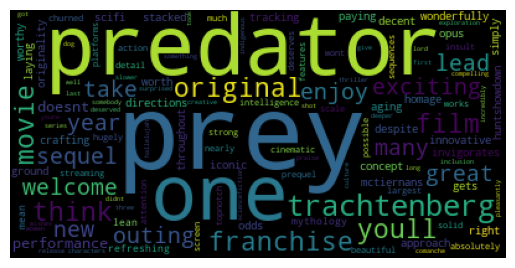

In [42]:
# Generate a word cloud image
wordcloud = WordCloud().generate(textstringfromTokens)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud)
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

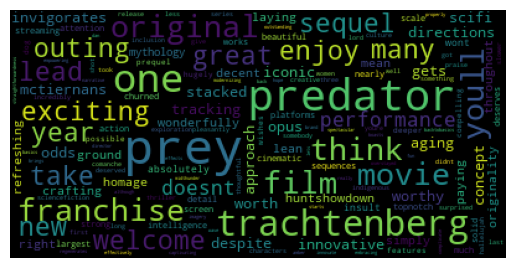

In [43]:
# take relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(max_font_size=40, relative_scaling=.5).generate(textstringfromTokens)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")

# Actions

## Action 1 Required: Collect Rotten Tomatoes reviews from a different movie

In [12]:
import requests
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords


#Get a movie's url from Rotten Tomatoes
URL = 'https://www.rottentomatoes.com/m/nope/reviews'
page = requests.get(URL)
soup = BeautifulSoup(page.content, 'html.parser')
results = soup.find(class_='review_table')

# Get the experts' reviews
review_texts = results.find_all('div', class_='row review_table_row')
#review_texts

for review_text in review_texts:
    author = review_text.find('a',class_="unstyled bold articleLink")
    date = review_text.find('div',class_="review-date subtle small")
    review = review_text.find('div',class_="the_review")
    
    author_clean = re.sub(r"[\(<>/)!#$%&'*+-.^_`|~:’]",'',author.text)
    date_clean = re.sub(r"[\(<>/)!#$%&'*+-.^_`|~:’]",'',date.text)
    review_clean = re.sub(r"[\(<>/)!#$%&'*+-.^_`|~:’]",'',review.text)
    #review_clean = re.sub(r"[^a-zA-Z0-9]+",' ',review.text)
    
    print(author_clean.strip(),date_clean.strip(), review_clean.strip())
    print("\n")
    

Alex Billington Sep 20 2022 Acclaimed horror filmmaker Jordan Peeles latest film Nope is an attempt at addressing our obsession with spectacle and this insatiable desire to look rather than look away


Kristen Maldonado Sep 16 2022 The first act of Nope is strange scary and even a little weird [but] the intrigue doesnt last


Casey Chong Sep 14 2022 Despite [Jordan] Peeles masterful direction in the IMAXworthy technical areas he sadly failed what equally matters as well — engaging character arcs and storytelling


Dan Buffa Sep 9 2022 Heres the thing I never got a sense of what Peele wanted this film to be outside of mildly shocking and thrilling The worst thing a film critic can leave a theater with is confusion over what the package delivered was supposed to mean or infer


Stephen Kearse Sep 8 2022 Nopes staging is more naturalistic Peele trusts his overwhelmed characters to forge a path through the storys obstacles and frights without obvious metacommentary


Vera Wylde Sep 8 2022 

### Required: Store your data into a dataframe -- Pandas

In [ ]:
moive_reviews = {'author': [], 'date': [], 'reviews':[]}

for review_text in review_texts:
    author = review_text.find('a',class_="unstyled bold articleLink")
    date = review_text.find('div',class_="review-date subtle small")
    review = review_text.find('div',class_="the_review")
    
    author_clean = re.sub(r"[\(<>/)!#$%&'*+-.^_`|~:’[]]",'',author.text)
    date_clean = re.sub(r"[\(<>/)!#$%&'*+-.^_`|~:’[]]",'',date.text)
    review_clean = re.sub(r"[^a-zA-Z0-9]+",' ',review.text)

    
    moive_reviews['author'].append(author_clean.strip())
    moive_reviews['date'].append(date_clean.strip())
    moive_reviews['reviews'].append(review_clean.strip())
    
reviews_df = pd.DataFrame(moive_reviews)
reviews_df.head(

## Action 2 Required: perform the sentiment analysis for the data that you have collected (Lexicon-based)

In [15]:
#Bing-Liu lexicon (positive word list & negative word list)
positive_words = open('Bing_liu_positive.txt', "r").read().splitlines()
negative_words = open('Bing_liu_negative.txt', "r").read().splitlines()


for review_text in review_texts:
    review = review_text.find('div',class_="the_review")
    review_clean = re.sub(r"[\(<>/)!#$%&'*+-.^_`|~:’“”?]",'',review.text)
    documents = [review_clean for document in review]
    token = [[word for word in document.lower().split() ] for document in documents]

    for sentence in token:
        positive = 0
        negative = 0
        for word in sentence:
            if word in positive_words:
                positive += 1
            elif word in negative_words:
                negative += 1
        print(positive, negative, positive-negative, "Positive" if positive-negative > 0 
              else "Neutral" if positive-negative == 0 else "Negative")
        
# Count positive, negative and neutral reviews
positive_review = []
negative_review = []
neutral_review = []

for review_text in review_texts:
    review = review_text.find('div',class_="the_review")
    review_clean = re.sub(r"[\(<>/)!#$%&'*+-.^_`|~:’“”?]",'',review.text)
    documents = [review_clean for document in review]
    token = [[word for word in document.lower().split() ] for document in documents]

    for sentence in token:
        positive = 0
        negative = 0
        for word in sentence:
            if word in positive_words:
                positive += 1
            elif word in negative_words:
                negative += 1
        if positive-negative > 0:
            positive_review.append(sentence)
        elif positive-negative == 0:
            neutral_review.append(sentence)
        else:
            negative_review.append(sentence)
        
print("Category")
# how many reviews for each category
print(len(positive_review), ' positive reviews')
print(len(negative_review), ' negative reviews')
print(len(neutral_review), ' neutral reviews')

2 1 1 Positive
1 3 -2 Negative
3 2 1 Positive
1 4 -3 Negative
0 1 -1 Negative
1 1 0 Neutral
1 3 -2 Negative
1 3 -2 Negative
0 2 -2 Negative
1 1 0 Neutral
1 4 -3 Negative
3 1 2 Positive
1 2 -1 Negative
0 2 -2 Negative
1 1 0 Neutral
1 1 0 Neutral
1 0 1 Positive
0 2 -2 Negative
0 1 -1 Negative
1 2 -1 Negative
Category
4  positive reviews
12  negative reviews
4  neutral reviews


## Action 3 Required: perform the word frequency analysis on the data

In [17]:
# remove common words 
cleantext = []
cleantexts = []

stoplist = stopwords.words('english', "'")

cleantexts = [[word for word in text if word not in stoplist] for text in positive_review]
#remove short words
cleantexts = [[ word for word in text if len(word) >= 3 ] for text in cleantexts]
cleantexts

# remove extra brackets from the list
cleantexts_tokens = [x for y in cleantexts for x in y]

# count words in list using methods from 'counter'
from collections import Counter
cleantexts_wordcounts= Counter(cleantexts_tokens)
cleantexts_wordcounts.most_common(20)

[('peeles', 3),
 ('nope', 2),
 ('spectacle', 2),
 ('look', 2),
 ('acclaimed', 1),
 ('horror', 1),
 ('filmmaker', 1),
 ('jordan', 1),
 ('latest', 1),
 ('film', 1),
 ('attempt', 1),
 ('addressing', 1),
 ('obsession', 1),
 ('insatiable', 1),
 ('desire', 1),
 ('rather', 1),
 ('away', 1),
 ('despite', 1),
 ('[jordan]', 1),
 ('masterful', 1)]

## Action 4 Optional: perform TF-IDF analysis on the data

## Action 5 Optional: perform a word-cloud map on the data